# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | ilabaya
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | papao
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | vernon
Processing Record 10 of Set 1 | siwa oasis
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | hadibu
Processing Record 15 of Set 1 | esil
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | palmas
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | el calafate
Processing Record 23 of Set 1 | bethel
P

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df["Max Temp"]=city_data_df["Max Temp"].apply(lambda x: x-273.15)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,28.24,79,40,3.60,US,1717787747
1,ilabaya,-17.4208,-70.5133,25.79,18,5,3.85,PE,1717787747
2,cidreira,-30.1811,-50.2056,21.17,78,13,1.58,BR,1717787748
3,port-aux-francais,-49.3500,70.2167,5.97,94,100,13.68,TF,1717787748
4,papao,-17.7500,-149.5500,27.82,86,100,4.92,PF,1717787748


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,28.24,79,40,3.60,US,1717787747
1,ilabaya,-17.4208,-70.5133,25.79,18,5,3.85,PE,1717787747
2,cidreira,-30.1811,-50.2056,21.17,78,13,1.58,BR,1717787748
3,port-aux-francais,-49.3500,70.2167,5.97,94,100,13.68,TF,1717787748
4,papao,-17.7500,-149.5500,27.82,86,100,4.92,PF,1717787748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

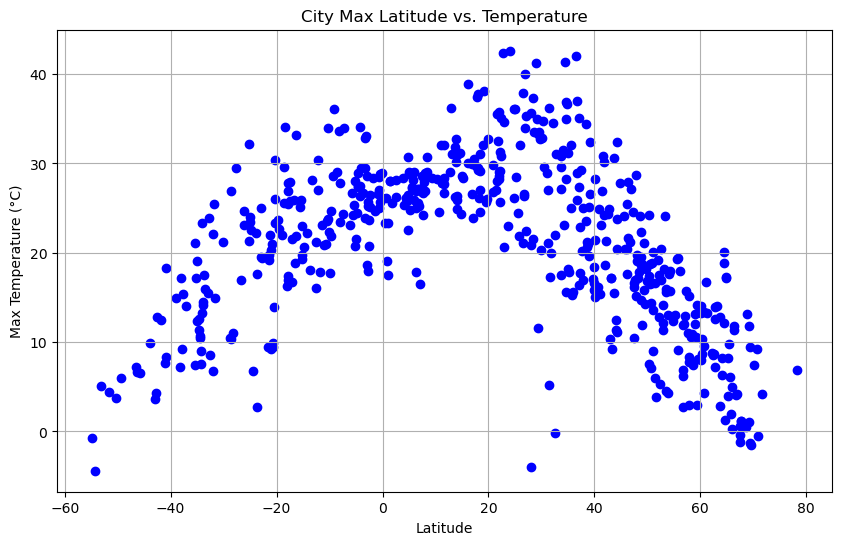

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

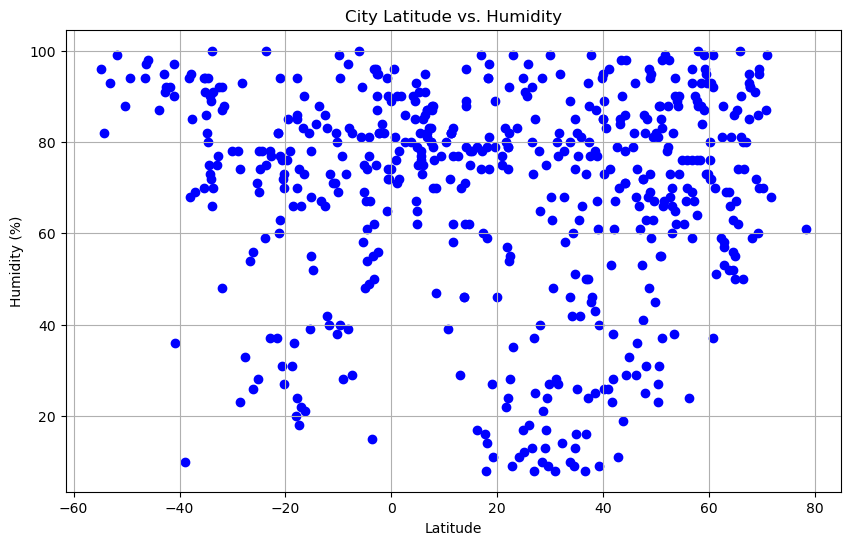

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='blue', marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

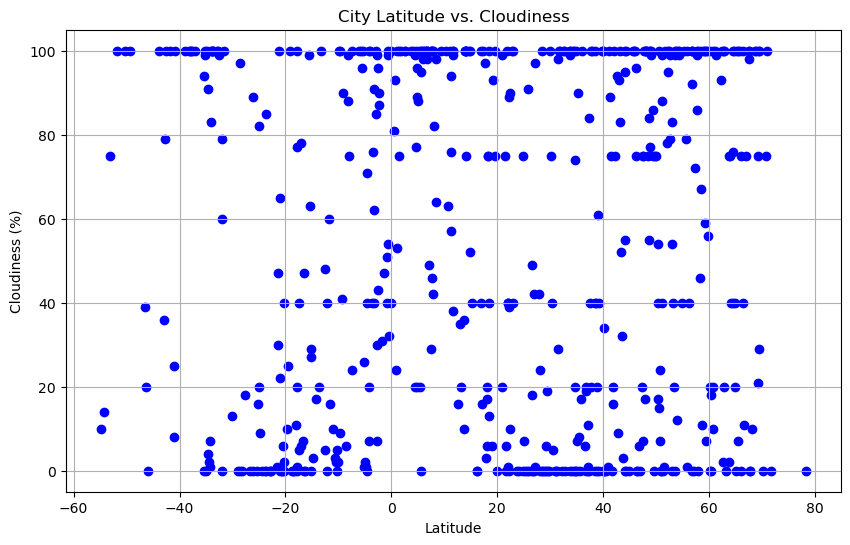

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='blue', marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

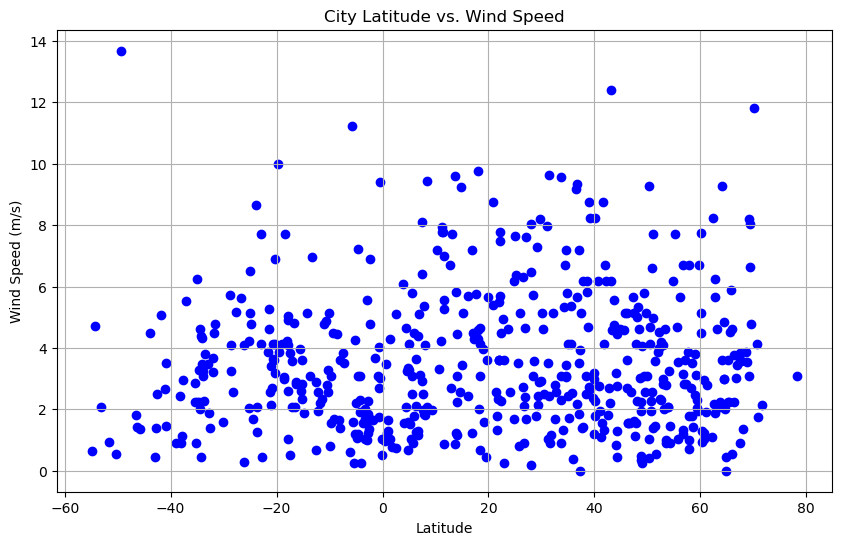

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='blue', marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col, x_label='X-axis', y_label='Y-axis'):
    # Extracting the x and y values
    x = df[x_col]
    y = df[y_col]
    
    # Performing linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Creating the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o')
    
    # Plotting the regression line
    plt.plot(x, intercept + slope * x, 'r')
    
    # Adding title and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.text(0.95, 0.95, f'y = {slope:.2f}x + {intercept:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')
    
    # Displaying the plot
    plt.show()
    
    # Return the r-value
    return r_value


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,28.24,79,40,3.60,US,1717787747
6,ilulissat,69.2167,-51.1000,1.01,86,75,3.09,GL,1717787748
7,lompoc,34.6391,-120.4579,28.21,74,0,3.09,US,1717787749
8,vernon,50.2581,-119.2691,24.23,23,54,1.03,CA,1717787749
9,siwa oasis,29.2041,25.5195,34.96,17,0,7.28,EG,1717787749


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilabaya,-17.4208,-70.5133,25.79,18,5,3.85,PE,1717787747
2,cidreira,-30.1811,-50.2056,21.17,78,13,1.58,BR,1717787748
3,port-aux-francais,-49.3500,70.2167,5.97,94,100,13.68,TF,1717787748
4,papao,-17.7500,-149.5500,27.82,86,100,4.92,PF,1717787748
5,lebu,-37.6167,-73.6500,15.34,85,100,2.97,CL,1717787748


###  Temperature vs. Latitude Linear Regression Plot

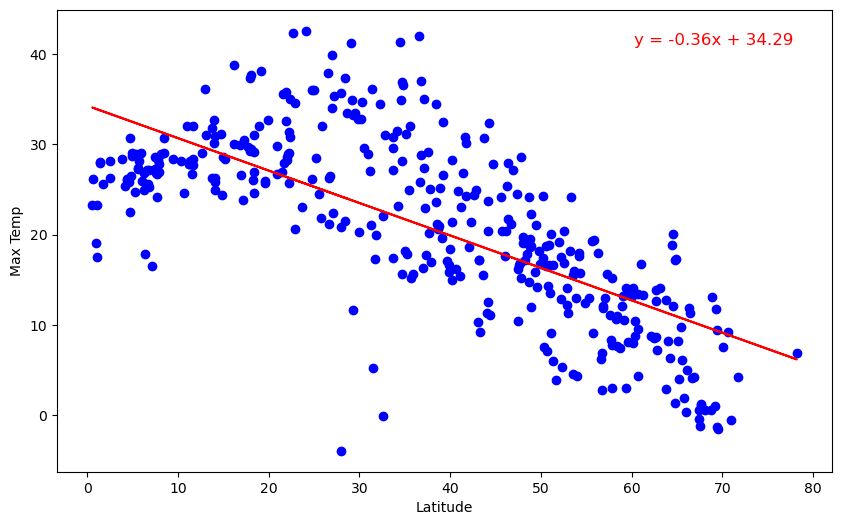

The r-value is: -0.7194369402744292


In [23]:
# Linear regression on Northern Hemisphere
r_value = plot_linear_regression(northern_hemi_df, "Lat", "Max Temp", x_label='Latitude', y_label='Max Temp')
# Print the r-value
print(f'The r-value is: {r_value}')


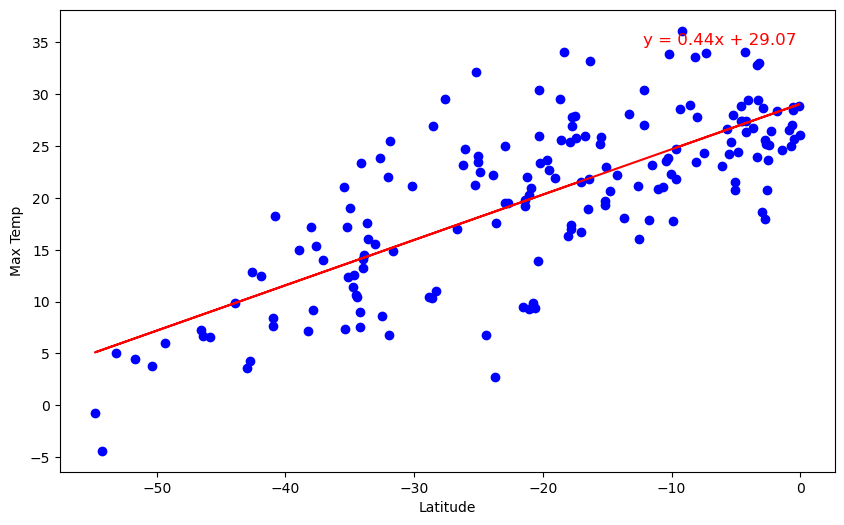

The r-value is: 0.7549269593179857


In [25]:
# Linear regression on Southern Hemisphere
r_value = plot_linear_regression(southern_hemi_df, "Lat", "Max Temp", x_label='Latitude', y_label='Max Temp')
# Print the r-value
print(f'The r-value is: {r_value}')

|**Discussion about the linear relationship:** The linear regression is modeling latitude and maximum temperature. In the northern hemisphere, there is a negative correlation between the two, whereas in the southern hemisphere the correlation is positive. This makes sense because as you move away from the equator and the latitude gets further from 0, the max temperature would become lower in the northern/southern hemispheres.  The strength of these correlations is high for both the northern and southern hemispheres, as the r-values are both >|.7|.

### Humidity vs. Latitude Linear Regression Plot

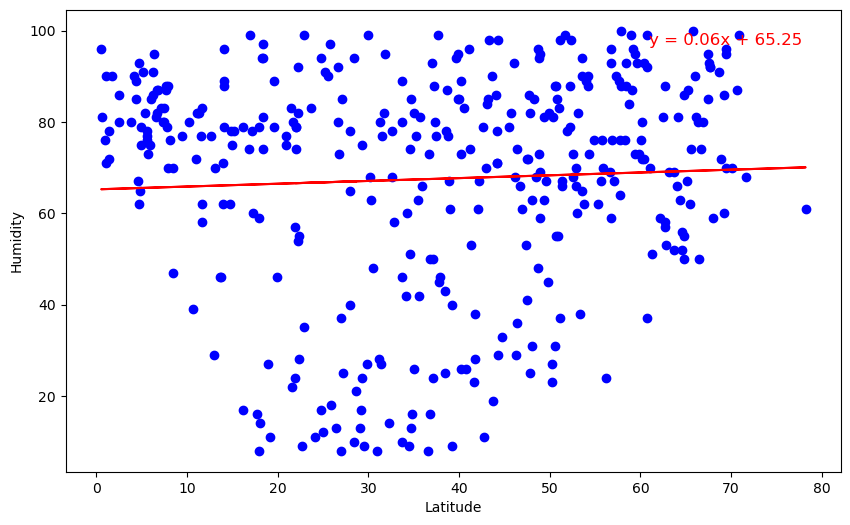

The r-value is: 0.05021003167694926


In [26]:
# Linear regression on Northern Hemisphere
r_value = plot_linear_regression(northern_hemi_df, "Lat", "Humidity", x_label='Latitude', y_label='Humidity')
# Print the r-value
print(f'The r-value is: {r_value}')



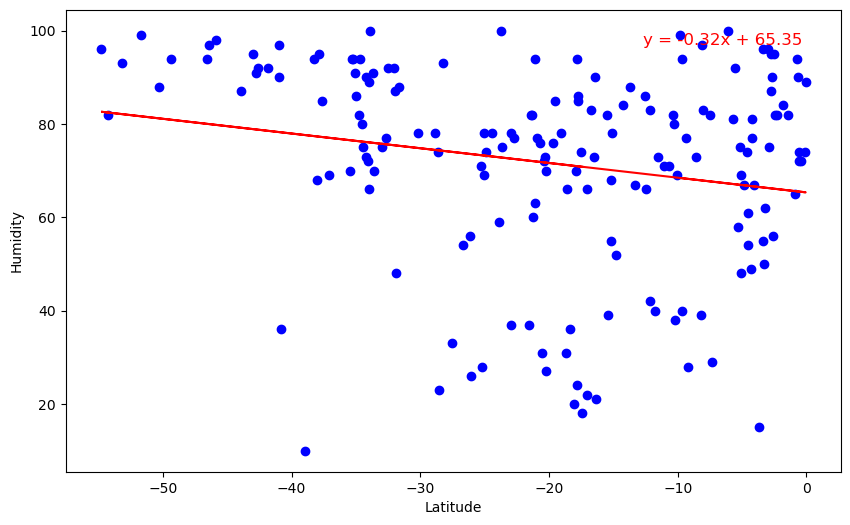

The r-value is: -0.20408982993051036


In [27]:
# Linear regression on Southern Hemisphere
r_value = plot_linear_regression(southern_hemi_df, "Lat", "Humidity", x_label='Latitude', y_label='Humidity')
# Print the r-value
print(f'The r-value is: {r_value}')

**Discussion about the linear relationship:** There is not much of a correlation between latitude and humidity in both the Northern and Southern hemispheres. Moreover, the strength of these correlations is weak. The Northern hemisphere has an r-value of .05, whereas the Southern hemisphere has an r-value of -.20. It makes sense when we think about humidity in Northern vs. Southern United States--both Miami and Seattle can get pretty humid. This tells us that latitude is not a good determining factor for humidity.

### Cloudiness vs. Latitude Linear Regression Plot

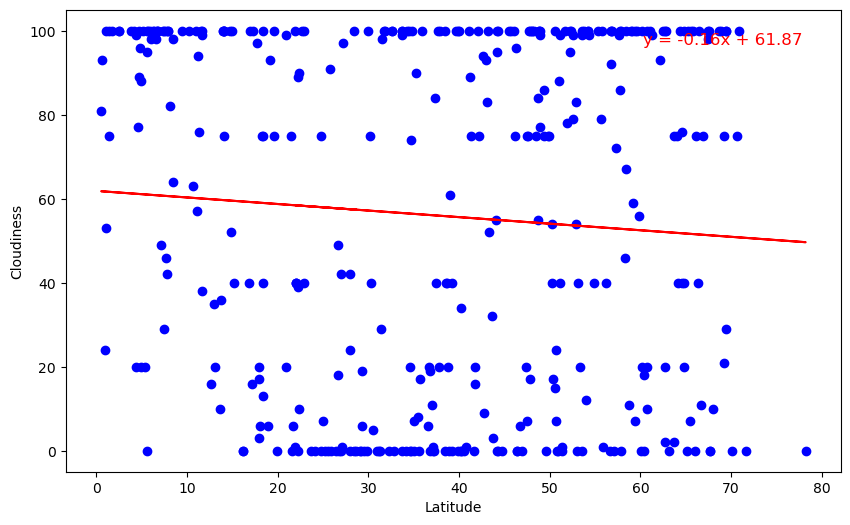

The r-value is: -0.07453730368626384


In [28]:
# Linear regression on Northern Hemisphere
r_value = plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness", x_label='Latitude', y_label='Cloudiness')
# Print the r-value
print(f'The r-value is: {r_value}')

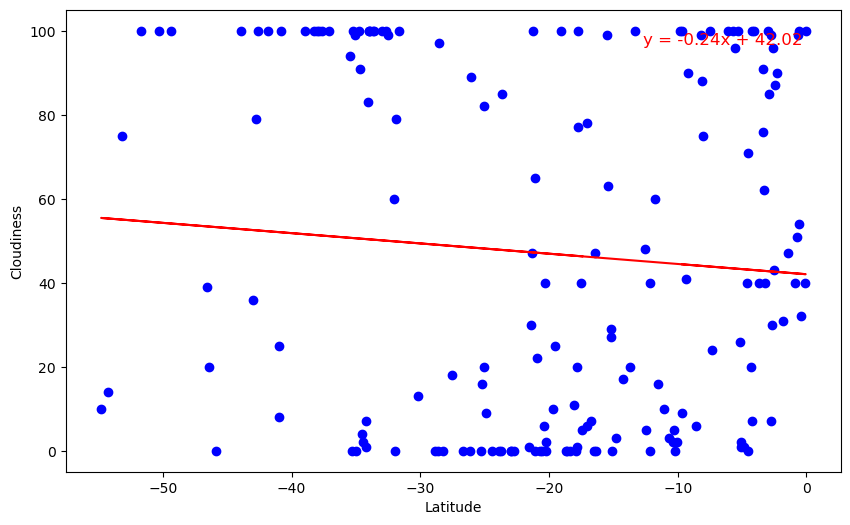

The r-value is: -0.08289569594498171


In [29]:
# Linear regression on Northern Hemisphere
r_value = plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness", x_label='Latitude', y_label='Cloudiness')
# Print the r-value
print(f'The r-value is: {r_value}')

**Discussion about the linear relationship:** We see similar behavior from the data pertaining to latitude vs. cloudiness as we did in our previous example. There is not much of a correlation and the strengths of these correlations is weak. Specifically, the r-value for the Northern hemisphere is -.07 and for the Southern hemisphere is -.08. This means that latitude is not a good factor for determining cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

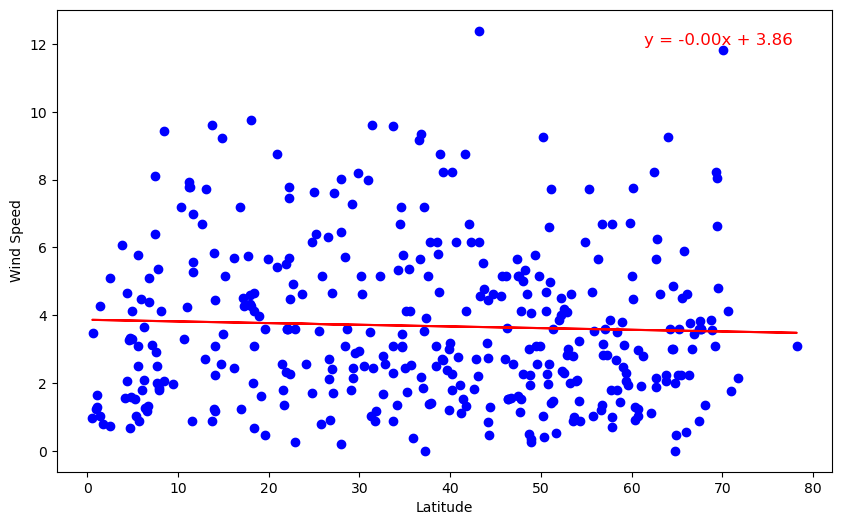

The r-value is: -0.04195713904629258


In [30]:
# Linear regression on Northern Hemisphere
r_value = plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed", x_label='Latitude', y_label='Wind Speed')
# Print the r-value
print(f'The r-value is: {r_value}')

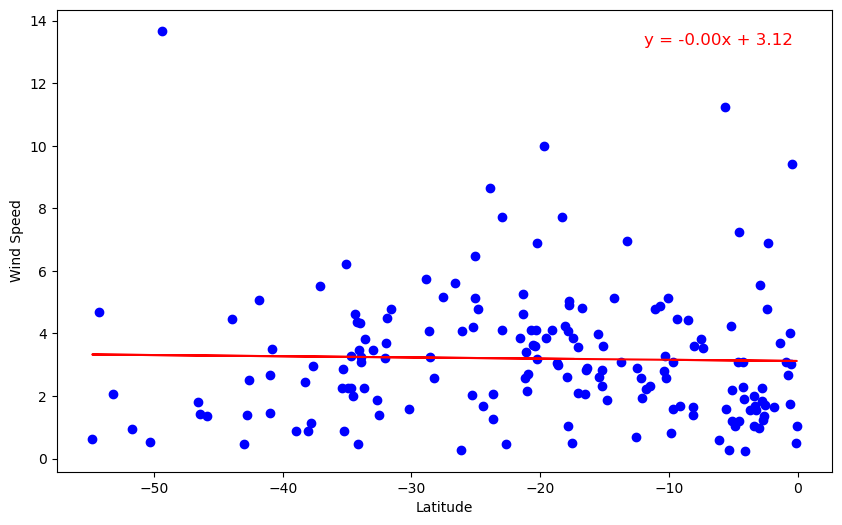

The r-value is: -0.02529230277424429


In [31]:
# Linear regression on Northern Hemisphere
r_value = plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed", x_label='Latitude', y_label='Wind Speed')
# Print the r-value
print(f'The r-value is: {r_value}')

**Discussion about the linear relationship:** When plotting latitude vs. wind speed, we see a slope of 0 for both the northern and southern hemispheres' data sets. Moreover, the r-values for the northern and southern hemispheres' data sets are -.04 and -.03, respectively, showing the strength of these minimal correlations is very weak.